In [11]:
import pandas as pd

import pandas as pd

In [12]:
df = pd.read_csv('viewing_activity.csv')

In [13]:
df.shape

(200, 10)

In [14]:
df.head(1)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Charlie,2013-03-20 5:17:53,0:00:05,NaN,Star Trek: Deep Space Nine: Season 5: Empok No...,NaN,Mac,0:00:05,Not latest view,US (United States)


In [15]:
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Charlie,2013-03-20 5:17:53,0:00:05,NaN,Star Trek: Deep Space Nine: Season 5: Empok No...,NaN,Mac,0:00:05,Not latest view,US (United States)
1,Charlie,2013-03-20 4:27:45,0:44:31,NaN,Star Trek: Deep Space Nine: Season 5: Blaze of...,NaN,Mac,0:44:31,Not latest view,US (United States)
2,Charlie,2013-03-20 4:05:21,0:22:06,NaN,Star Trek: Deep Space Nine: Season 5: Children...,NaN,Mac,0:44:37,0:44:37,US (United States)
3,Charlie,2013-03-20 0:20:03,0:48:14,NaN,The Invisible War,NaN,Microsoft Xbox 360,0:53:18,0:53:18,US (United States)
4,Charlie,2013-03-20 0:10:31,0:04:51,NaN,The Invisible War,NaN,Mac,0:05:01,Not latest view,US (United States)


In [16]:
df.dtypes

Profile Name                object
Start Time                  object
Duration                    object
Attributes                 float64
Title                       object
Supplemental Video Type    float64
Device Type                 object
Bookmark                    object
Latest Bookmark             object
Country                     object
dtype: object

In [17]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)

In [18]:
df.dtypes

Profile Name                            object
Start Time                 datetime64[ns, UTC]
Duration                                object
Attributes                             float64
Title                                   object
Supplemental Video Type                float64
Device Type                             object
Bookmark                                object
Latest Bookmark                         object
Country                                 object
dtype: object

In [19]:
df = df.set_index('Start Time')
df.index = df.index.tz_convert('US/Pacific')
df = df.reset_index()

In [20]:
df.head(1)

,Start Time,Profile Name,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,2013-03-19 22:17:53-07:00,Charlie,0:00:05,NaN,Star Trek: Deep Space Nine: Season 5: Empok No...,NaN,Mac,0:00:05,Not latest view,US (United States)


In [21]:
df['Duration'] = pd.to_timedelta(df['Duration'])

In [22]:
office = df[df['Title'].str.contains('The Office (U.S.)', regex=False)]

In [23]:
office.shape

(137, 10)

In [24]:
office = office[(office['Duration'] > '0 days 00:01:00')]

In [25]:
office.shape

(130, 10)

In [26]:
office['Duration'].sum()

Timedelta('1 days 14:57:28')

In [27]:
office['weekday'] = office['Start Time'].dt.weekday

In [28]:
office['hour'] = office['Start Time'].dt.hour

In [29]:
office.head(1)

,Start Time,Profile Name,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,weekday,hour
10,2013-03-18 16:04:22-07:00,Charlie,0 days 00:21:07,NaN,The Office (U.S.): Season 5: Moroccan Christma...,NaN,Mac,0:21:06,Not latest view,US (United States),0,16


In [30]:
%matplotlib inline
import matplotlib

In [31]:
%matplotlib inline
import matplotlib

In [32]:
office['weekday'] = pd.Categorical(office['weekday'], categories=[0,1,2,3,4,5,6], ordered=True)

In [33]:
office_by_day = office['weekday'].value_counts()

In [34]:
office_by_day = office_by_day.sort_index()

<AxesSubplot:title={'center':'Office Episodes Watched by Day'}>

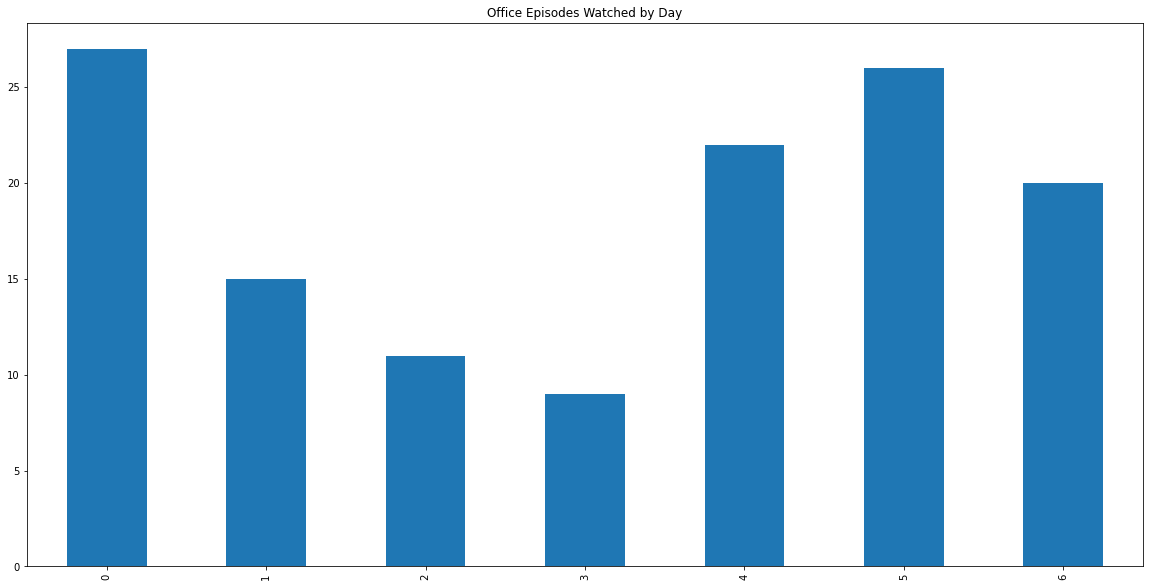

In [35]:
office_by_day.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Day')

In [36]:
office['hour'] = pd.Categorical(office['hour'], categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)

In [37]:
office_by_hour = office['hour'].value_counts()

In [38]:
office_by_hour = office_by_hour.sort_index()

AttributeError: 'Rectangle' object has no property 'titled'

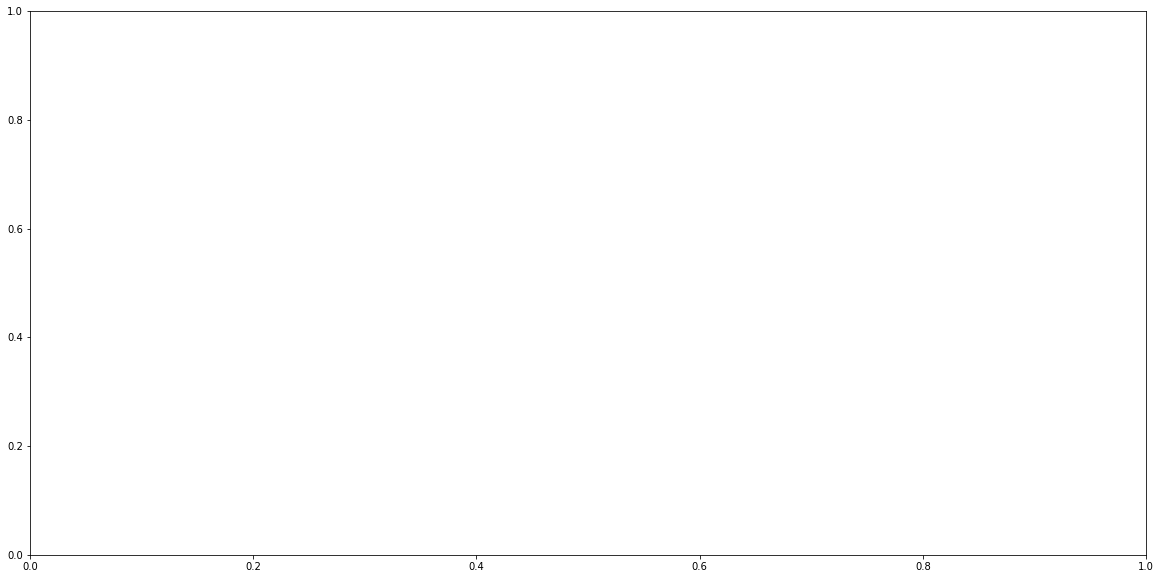

In [39]:
office_by_hour.plot(kind='bar', figsize=(20,10), titled='Office Episodes Watched by Hour')

<AxesSubplot:title={'center':'Office Episodes Watched by Hour'}>

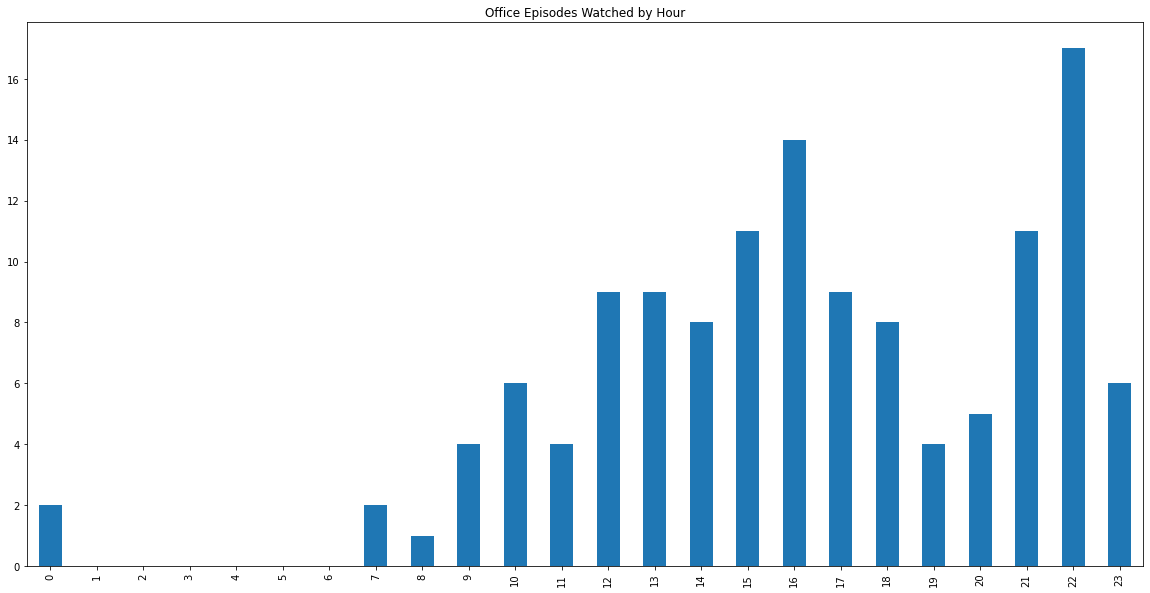

In [40]:
office_by_hour.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Hour')